# Project Data Science Desired Skills

this project will Answer the question of what are the most desired skills for Data Science in Egypt and UAE.
* Extract data from Linked in Via webscrapping or Manually.
* Perform data wrangling ( image recognition or NLP).
* Segment the the job market based on skills.
* Analyze the skill growth over time.

In [3]:
#import needed libraries

from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from scrapy import selector
import time
import operator
from functools import reduce
import dateparser
import numpy as np
import matplotlib.pyplot as plt

import re
import string
from collections import Counter
import spacy
from spacy.vocab import Vocab
from spacy.tokenizer import Tokenizer
import en_core_web_sm
from nltk.stem import PorterStemmer

from bs4 import BeautifulSoup

## step 1 Importing Data


#### Selenium driver for chrome

In [4]:
# instantiate a webdriver
driver = webdriver.Chrome('C:\\Users\\mosta\\Downloads\\chromedriver.exe')

In [5]:
# user search keywards and location
#job, loc= input("please enter the desired job and location:").split()
#url= 'https://www.linkedin.com/jobs/search/?geoId=106155005&keywords={}&location={}'

In [6]:
# use chrome to get the desired url
driver.get('https://www.linkedin.com/jobs/search/?geoId=106155005&keywords=data%20scientist&location=Egypt')

In [7]:
# the job card container(link for job)
#full_card_link= driver.find_elements_by_class_name("result-card__full-card-link")
full_card_link= driver.find_elements_by_class_name("base-card__full-link")

In [8]:
# view the Selenium elment count
len(full_card_link)

24

In [9]:
# extract Href from full card link
link_list=[]
for element in full_card_link:
    link_list.append(element.get_attribute('href'))

In [10]:
# create list place holder for data
job_title=[]
company=[]
location=[]
posting_date=[]
applicants_count=[]
job_description=[]
skill_set=[]
job_seniority_level=[]
employment_type=[]
industry=[]
job_function=[]

In [11]:
# create a function to iterate over job links

def get_job(links):
    ''' function to import the required data (10 specifications) from the search url'''
    for link in range(len(links)):
        driver.get(links[link])
        job_title.append(driver.find_element_by_class_name("topcard__title").text)
        company.append(driver.find_element_by_class_name('topcard__flavor').text)
        location.append(driver.find_element_by_xpath('/html/body/main/section[1]/section[2]/div/div[1]/div/h4/div[1]/span[2]').text)
        posting_date.append(driver.find_element_by_xpath('/html/body/main/section[1]/section[2]/div/div[1]/div/h4/div[2]/span[1]').text)
        try:
            applicants_count.append(driver.find_element_by_xpath('//*[@id="main-content"]/section[1]/section[2]/div[1]/div[1]/h3[2]/span[2]').text)
        except:
            applicants_count.append('')
        job_description.append(driver.find_element_by_xpath('//*[@id="main-content"]/section[1]/section[3]/div/section/div').text)
        try:
            job_seniority_level.append(driver.find_element_by_xpath('//*[@id="main-content"]/section[1]/section[3]/ul/li[1]/span').text)
        except:
            job_seniority_level.append('')
        try:
            employment_type.append(driver.find_element_by_xpath('/html/body/main/section[1]/section[3]/ul/li[2]/span').text)
        except:
            employment_type.append('')            
        try:
            industry.append(driver.find_element_by_xpath('//*[@id="main-content"]/section[1]/section[3]/ul/li[4]/span').text)
        except:
            industry.append('')
        try:
            job_function.append(reduce(operator.concat, [(e.text+ ", ") for e in driver.find_elements_by_xpath('//*[@id="main-content"]/section[1]/section[3]/ul/li[3]/span')]))
        except:
            job_function.append('')
        try:
            skill_set.append(reduce(operator.concat, [(e.get_attribute('innerHTML')) for e in driver.find_element_by_xpath('//*[@id="main-content"]/section[1]/section[3]/div/section/div').find_elements_by_tag_name("li")]))
        except:
            skill_set.append('')
        time.sleep(15)


In [12]:
#use the function to import the data
get_job(link_list)

In [13]:
# convert lists acqquired to a dataframe
data= pd.DataFrame(list(zip(job_title, company, location, posting_date, applicants_count, job_description, skill_set, job_seniority_level,
                            employment_type, industry, job_function)),
                   columns=['job_title', 'company', 'location', 'posting_date', 'applicants_count', 'job_description', 'skill_set','job_seniority_level',
                            'employment_type', 'industry', 'job_function'])

In [14]:
# inspect the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_title            24 non-null     object
 1   company              24 non-null     object
 2   location             24 non-null     object
 3   posting_date         24 non-null     object
 4   applicants_count     24 non-null     object
 5   job_description      24 non-null     object
 6   skill_set            24 non-null     object
 7   job_seniority_level  24 non-null     object
 8   employment_type      24 non-null     object
 9   industry             24 non-null     object
 10  job_function         24 non-null     object
dtypes: object(11)
memory usage: 2.2+ KB


In [15]:
# view the df head
data.head()

,job_title,company,location,posting_date,applicants_count,job_description,skill_set,job_seniority_level,employment_type,industry,job_function
0,Insights Data Scientist,Dell Technologies,"Cairo, Cairo, Egypt",1 month ago,,Data Scientist\n\nThe Office of the CTO at Del...,Perform all the phases of a data science proje...,Not Applicable,Full-time,"Computer Hardware, Computer Software, and Info...","Information Technology and Engineering,"
1,Data Office Data Scientist,Dell Technologies,"Cairo, Cairo, Egypt",1 month ago,,Data Scientist\n\nThe Office of the CTO at Del...,Perform all the phases of a data science proje...,Not Applicable,Full-time,"Computer Hardware, Computer Software, and Info...","Information Technology and Engineering,"
2,Consumer Credit Data Scientist - Jumia Pay (Fu...,Jumia Group,"Cairo, Cairo, Egypt",3 days ago,,Jumia is a leading e-commerce platform in Afri...,Credit Default Risk Prediction Consumer Scor...,Entry level,Full-time,"Information Technology and Services, Internet,...","Engineering and Information Technology,"
3,Data Engineer (DBT/Looker/BigQuery),360Imaging,"Al Jizah, Egypt",1 day ago,,Duties\nDevelop and optimize large-scale batch...,Develop and optimize large-scale batch and rea...,Full-time,,,
4,Data Scientist,Envision Employment Solutions,"Cairo, Cairo, Egypt",3 weeks ago,,Ready and hungry for a new adventure? You are ...,"After filling your online application, you wi...",Entry level,Part-time,"Information Technology and Services, Computer ...","Engineering and Information Technology,"


In [16]:
# inspect duplicates
data[data.duplicated()]

,job_title,company,location,posting_date,applicants_count,job_description,skill_set,job_seniority_level,employment_type,industry,job_function


In [17]:
# we will asssign it to a dates variable and put it in a list and apply changes to the values as shown below
dates=list(data['posting_date'])

In [18]:
# explore the job post date column
dates

['1 month ago',
 '1 month ago',
 '3 days ago',
 '1 day ago',
 '3 weeks ago',
 '5 days ago',
 '1 week ago',
 '1 month ago',
 '3 weeks ago',
 '2 weeks ago',
 '1 month ago',
 '4 days ago',
 '1 day ago',
 '4 weeks ago',
 '1 month ago',
 '1 day ago',
 '1 week ago',
 '5 days ago',
 '1 month ago',
 '1 month ago',
 '1 week ago',
 '1 day ago',
 '2 weeks ago',
 '3 weeks ago']

In [19]:
# a funtion that transforms 'x ago format' to 'datetime' format
def date(x):
    return dateparser.parse(x).strftime("%Y-%m-%d")

In [20]:
# for an example
date('3 weeks ago')

'2021-08-10'

In [21]:
# apply the fnction to a dates list
transformed_dates=list(map(date,dates))

In [22]:
# the transformed resullt
transformed_dates

['2021-07-31',
 '2021-07-31',
 '2021-08-28',
 '2021-08-30',
 '2021-08-10',
 '2021-08-26',
 '2021-08-24',
 '2021-07-31',
 '2021-08-10',
 '2021-08-17',
 '2021-07-31',
 '2021-08-27',
 '2021-08-30',
 '2021-08-03',
 '2021-07-31',
 '2021-08-30',
 '2021-08-24',
 '2021-08-26',
 '2021-07-31',
 '2021-07-31',
 '2021-08-24',
 '2021-08-30',
 '2021-08-17',
 '2021-08-10']

In [23]:
# replace the new dates values with the old posting_date column values in the data frame
data['posting_date'] =np.array(transformed_dates)

In [24]:
# transforming the posting_date datatype into 'datetime' instead of 'object'
data['posting_date']=pd.to_datetime(data['posting_date'])

In [25]:
#the final result
data.head()

,job_title,company,location,posting_date,applicants_count,job_description,skill_set,job_seniority_level,employment_type,industry,job_function
0,Insights Data Scientist,Dell Technologies,"Cairo, Cairo, Egypt",2021-07-31,,Data Scientist\n\nThe Office of the CTO at Del...,Perform all the phases of a data science proje...,Not Applicable,Full-time,"Computer Hardware, Computer Software, and Info...","Information Technology and Engineering,"
1,Data Office Data Scientist,Dell Technologies,"Cairo, Cairo, Egypt",2021-07-31,,Data Scientist\n\nThe Office of the CTO at Del...,Perform all the phases of a data science proje...,Not Applicable,Full-time,"Computer Hardware, Computer Software, and Info...","Information Technology and Engineering,"
2,Consumer Credit Data Scientist - Jumia Pay (Fu...,Jumia Group,"Cairo, Cairo, Egypt",2021-08-28,,Jumia is a leading e-commerce platform in Afri...,Credit Default Risk Prediction Consumer Scor...,Entry level,Full-time,"Information Technology and Services, Internet,...","Engineering and Information Technology,"
3,Data Engineer (DBT/Looker/BigQuery),360Imaging,"Al Jizah, Egypt",2021-08-30,,Duties\nDevelop and optimize large-scale batch...,Develop and optimize large-scale batch and rea...,Full-time,,,
4,Data Scientist,Envision Employment Solutions,"Cairo, Cairo, Egypt",2021-08-10,,Ready and hungry for a new adventure? You are ...,"After filling your online application, you wi...",Entry level,Part-time,"Information Technology and Services, Computer ...","Engineering and Information Technology,"


In [26]:
# inspect the output dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   job_title            24 non-null     object        
 1   company              24 non-null     object        
 2   location             24 non-null     object        
 3   posting_date         24 non-null     datetime64[ns]
 4   applicants_count     24 non-null     object        
 5   job_description      24 non-null     object        
 6   skill_set            24 non-null     object        
 7   job_seniority_level  24 non-null     object        
 8   employment_type      24 non-null     object        
 9   industry             24 non-null     object        
 10  job_function         24 non-null     object        
dtypes: datetime64[ns](1), object(10)
memory usage: 2.2+ KB


### Observations

* The dataset contains 23 rows and 11 columns.
* The column data types are objects.
* There is a no duplicated row in the dataset.
* posting_date column was in the format of 'x days ago' and a string data type which we had to amend and transform it into a "%Y-%m-%d" format and a datetime datatype

## Exploratory Data analysis

In [27]:
# check summary statistics
data.describe()

<ipython-input-27-3ca3cee4e6a5>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,job_title,company,location,posting_date,applicants_count,job_description,skill_set,job_seniority_level,employment_type,industry,job_function
count,24,24,24,24,24,24,24,24,24,24,24
unique,20,15,6,9,1,24,24,4,3,12,8
top,Senior Data Scientist,Dell Technologies,"Cairo, Cairo, Egypt",2021-07-31 00:00:00,,Data Engineer\n\nThe Office of the CTO at Dell...,Credit Default Risk Prediction Consumer Scor...,Not Applicable,Full-time,"Computer Hardware, Computer Software, and Info...","Information Technology,"
freq,3,5,14,7,24,1,1,8,19,6,7
first,NaN,NaN,NaN,2021-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-08-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<BarContainer object of 24 artists>

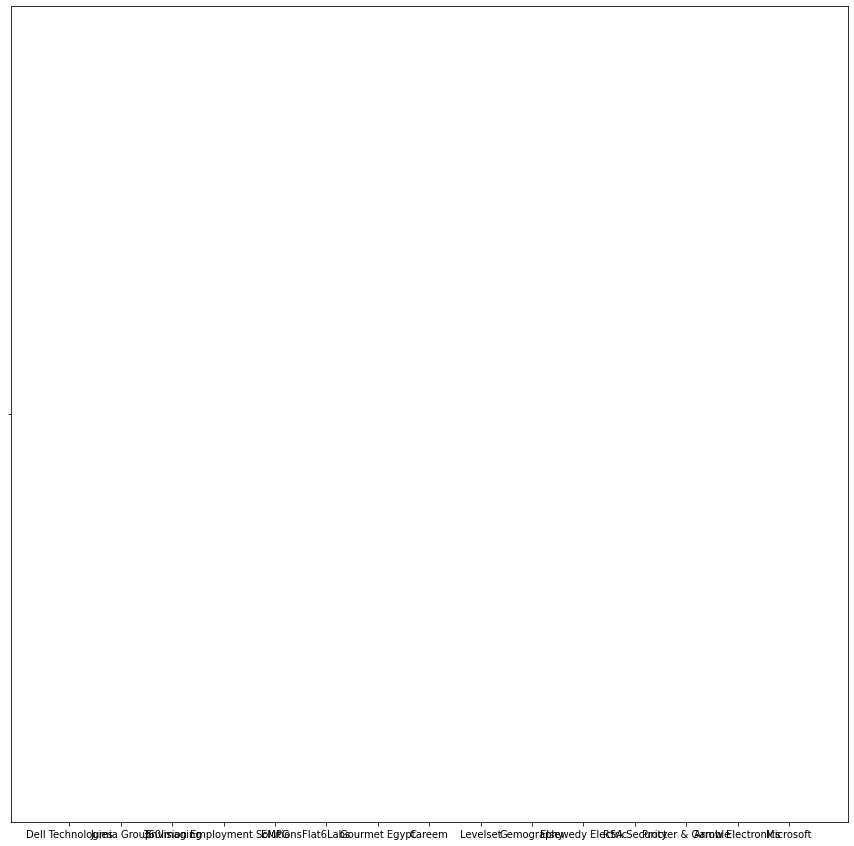

In [28]:
# checking applicat count for each company with a bar chart

plt.figure(figsize=(15,15))
plt.bar(data['company'],data['applicants_count'])

### which market skills are needed for a Data scientist title?

In [29]:
data['skill_set']

0     Perform all the phases of a data science proje...
1     Perform all the phases of a data science proje...
2      Credit Default Risk Prediction  Consumer Scor...
3     Develop and optimize large-scale batch and rea...
4      After filling your online application, you wi...
5     Manipulate and translate big data into key ins...
6     Undertaking data collection, preprocessing and...
7     Develop high quality, reliable and maintainabl...
8      After filling your online application, you wi...
9     Develop, execute, and manage&nbsp;databases, d...
10     Deliver on Applied AI topics in Marketplace: ...
11    Data Extraction:We will be extracting data fro...
12    Take ownership and responsibility of data prod...
13    Understanding business inquiries for different...
14    Create and maintain optimal data pipeline arch...
15    Synthesize billions of records from hundreds o...
16    Execute all the phases of a data science proje...
17    Design, implement and support data warehou

In [30]:
# create a csv as a reference
data.to_csv('linkedin_jobs.csv')

## Part 2

### Extracting Insights about skill_set using NLP 

In [31]:
# declare a function to prepare skil_set column for nlp

def preprocess_text(text):
    text = text.replace('\n', ' ')
    text = BeautifulSoup(text, 'lxml').get_text()
    text = text.replace('/', ' ')
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    text = text.lower()
    text = re.sub(r'(x.[0-9])', '',text)
    return text

In [32]:
# apply preprocessing to the desired column
data['refined_skilss']= data.apply(lambda x: preprocess_text(x['skill_set']), axis=1)

In [33]:
# inspect the pre-processd column
data['refined_skilss']

0     perform all the phases of a data science proje...
1     perform all the phases of a data science proje...
2     credit default risk prediction  consumer scori...
3     develop and optimize largescale batch and real...
4     after filling your online application you will...
5     manipulate and translate big data into key ins...
6     undertaking data collection preprocessing and ...
7     develop high quality reliable and maintainable...
8     after filling your online application you will...
9     develop execute and managedatabases data colle...
10    deliver on applied ai topics in marketplace mu...
11    data extractionwe will be extracting data from...
12    take ownership and responsibility of data prod...
13    understanding business inquiries for different...
14    create and maintain optimal data pipeline arch...
15    synthesize billions of records from hundreds o...
16    execute all the phases of a data science proje...
17    design implement and support data warehous

In [34]:
# Intiation of the tokenizer
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = spacy.load("en_core_web_sm")


tokenizer = Tokenizer(nlp.vocab)


Stop_words = nlp.Defaults.stop_words

[code for below text was referenced from this website](https://prrao87.github.io/blog/spacy/nlp/performance/2020/05/02/spacy-multiprocess.html#Read-in-New-York-Times-Dataset)

In [35]:
# define lemmatizer function
def lemmatize(text):
    doc =nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                 if tok.is_alpha and tok.text.lower() not in Stop_words]
    return lemma_list

In [36]:
data['lemma']= data['refined_skilss'].apply(lemmatize)

In [37]:
'''
tokens = []

for doc in tokenizer.pipe(data['refined_skilss'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in Stop_words) & (token.text != ' '):
            doc_tokens.append(token.lemma)

    tokens.append(doc_tokens)

data['tokens'] = tokens
'''
             


"\ntokens = []\n\nfor doc in tokenizer.pipe(data['refined_skilss'], batch_size=500):\n    \n    doc_tokens = []\n    for token in doc:\n        if (token.lemma_ not in Stop_words) & (token.text != ' '):\n            doc_tokens.append(token.lemma)\n\n    tokens.append(doc_tokens)\n\ndata['tokens'] = tokens\n"

In [38]:
# Use English stemmer.
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("english")
#data['tokens'] = data['refined_skilss'].apply(lambda x: [stemmer.stem(x) for y in x]) # Stem every word.


In [39]:
data['lemma']

0     [perform, phase, data, science, project, busin...
1     [perform, phase, data, science, project, busin...
2     [credit, default, risk, prediction, consumer, ...
3     [develop, optimize, largescale, batch, realtim...
4     [fill, online, application, receive, psychomet...
5     [manipulate, translate, big, datum, key, insig...
6     [undertake, data, collection, preprocessing, a...
7     [develop, high, quality, reliable, maintainabl...
8     [fill, online, application, receive, psychomet...
9     [develop, execute, managedatabase, data, colle...
10    [deliver, apply, ai, topic, marketplace, multi...
11    [datum, extractionwe, extract, datum, thousand...
12    [ownership, responsibility, datum, produce, da...
13    [understand, business, inquiry, different, com...
14    [create, maintain, optimal, datum, pipeline, a...
15    [synthesize, billion, record, hundred, differe...
16    [execute, phase, data, science, project, inclu...
17    [design, implement, support, datum, wareho

In [41]:
'''
function to split the required skills per token

from collections import Counter


p = Counter(" ".join(data['lemma']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)
'''


'\nfunction to split the required skills per token\n\nfrom collections import Counter\n\n\np = Counter(" ".join(data[\'lemma\']).split()).most_common(10)\nrslt = pd.DataFrame(p, columns=[\'Word\', \'Frequency\'])\nprint(rslt)\n'